Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8185 - loss: 0.5883 - val_accuracy: 0.9674 - val_loss: 0.1058
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9502 - loss: 0.1646 - val_accuracy: 0.9785 - val_loss: 0.0668
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9632 - loss: 0.1185 - val_accuracy: 0.9812 - val_loss: 0.0588
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9693 - loss: 0.1012 - val_accuracy: 0.9829 - val_loss: 0.0475
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9735 - loss: 0.0840 - val_accuracy: 0.9845 - val_loss: 0.0451
Test accuracy: 98.45%


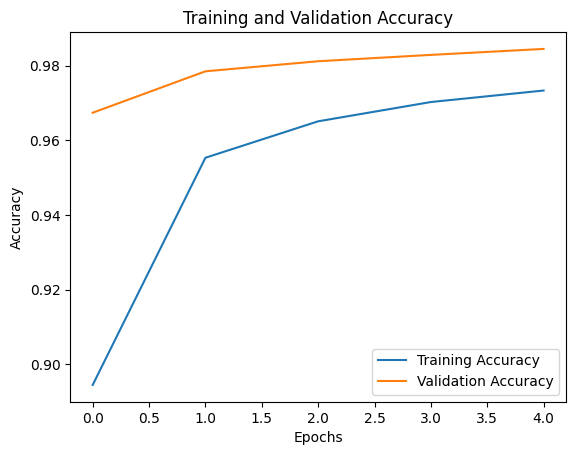

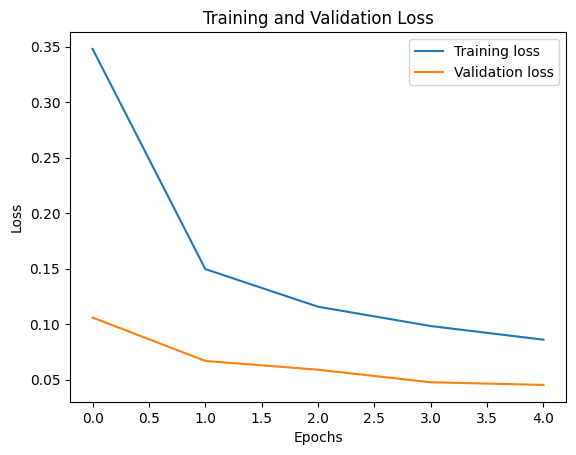

In [40]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
# Load the MNIST dataset
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    return X_train, y_train,X_test, y_test

def preprocess_data(X_train, y_train,X_test, y_test):
    # Normalize the pixel values to be between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape data to (num_samples, height, width, channels)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
    y_test = to_categorical(y_test, 10)    # 10 classes (digits 0-9)

    return X_train, y_train, X_test, y_test

def build_cnn_model(input_shape):
    """
    Builds and compiles a Convolutional Neural Network (CNN) for image classification.
    """
    model = Sequential() # Initialize the model as a Sequential (layer-by-layer) model
    
    # Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation, input shape specified
    model.add(Conv2D(21,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    
    # Max Pooling Layer: Reduces the image size (downsampling) to preserve important features
    # default is (2,2) so not specifying a pool size at the moment
    model.add(MaxPooling2D())
    
    #Dropout Layer: Prevents overfitting by randomly turning off 25% of the neurons during training
    model.add(Dropout(0.25))

    #Flatten Layer: Converts 2D feature maps into 1D vector to pass to fully connected layers
    model.add(Flatten())

    #Fully connected layer: Converts 2D feature maps into 1D vector to pass to fully connected layers
    model.add(Dense(128,activation='relu'))
    
    # Dropout Layer: Further prevents overfitting by turning off 50% of neurons in the dense layer
    model.add(Dropout(0.5))
    
    # Output Layer: 10 neurons (for 10 classes) with softmax activation to give probability distribution
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

def train_cnn_model(model, X_train, y_train, X_test, y_test, epochs=5, batch_size=64):
    """
    Trains the CNN model using the training data and evaluates it on the test data.
    """
    # Train the model using the training data (X_train and y_train)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    
    # Evaluate the model on the test data
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {score[1] * 100:.2f}%")
    
    return model, history

# Plot Training and Validation Accuracy
def plot_history(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    #Plot loss
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()   

    
#load data
X_train, y_train,X_test, y_test = load_data()

#preprocess data
X_train, y_train,X_test, y_test = preprocess_data(X_train, y_train,X_test, y_test)

#build cnn model
input_shape = (28,28,1) # shape of grayscale images used as per in this exercise
model = build_cnn_model(input_shape)

#train the cnn model
model,history = train_cnn_model(model, X_train, y_train, X_test, y_test, epochs=5, batch_size=80)

plot_history(history)
